<a href="https://colab.research.google.com/github/RaquelSMartins/Trabalho_Final_PCDAS/blob/main/EDA_artigo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import plotly.graph_objects as gp

In [ ]:
suicide = pd.read_csv('/content/drive/MyDrive/Data_paper_pcdas/txs_suicidio.csv')
alcohol = pd.read_csv('/content/drive/MyDrive/Data_paper_pcdas/txs_uso_alcool.csv')
humor= pd.read_csv('/content/drive/MyDrive/Data_paper_pcdas/txs_mortalidade_transtorno_humor.csv')

In [ ]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8712 entries, 0 to 8711
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tipo_Local                         8712 non-null   object 
 1   Local                              8712 non-null   object 
 2   Ano                                8712 non-null   int64  
 3   Sexo                               8712 non-null   object 
 4   Faixa_Etaria                       8712 non-null   object 
 5   Obitos                             8712 non-null   int64  
 6   Populacao                          8712 non-null   float64
 7   Taxa_Especifica                    8712 non-null   float64
 8   Taxa_Modificada                    8712 non-null   float64
 9   Taxa_Bruta                         8712 non-null   float64
 10  Taxa_Padronizada                   8712 non-null   float64
 11  Taxa_Padronizada_Por_Sexo          8712 non-null   float

In [ ]:
humor.head()

,Tipo_Local,Local,Ano,Sexo,Faixa_Etaria,Obitos,Populacao,Taxa_Especifica,Taxa_Modificada,Taxa_Bruta,Taxa_Padronizada,Taxa_Padronizada_Por_Sexo,Taxa_Bruta_Por_Sexo,Taxa_Padronizada_Por_Faixa_Etaria,Taxa_Bruta_Por_Faixa_Etaria
0,Pais,Brasil,2000,Feminino,De 0 a 14 anos,0,25894245.0,0.000,0.000,0.06,0.074,0.082183,0.066,0.000000,0.000
1,Pais,Brasil,2000,Feminino,De 15 a 19 anos,1,9010765.0,0.011,0.000,0.06,0.074,0.082183,0.066,0.005459,0.006
2,Pais,Brasil,2000,Feminino,De 20 a 24 anos,1,8222283.0,0.012,0.001,0.06,0.074,0.082183,0.066,0.030516,0.031
3,Pais,Brasil,2000,Feminino,De 25 a 49 anos,10,30390022.0,0.033,0.006,0.06,0.074,0.082183,0.066,0.030558,0.030
4,Pais,Brasil,2000,Feminino,De 50 a 69 anos,17,11065726.0,0.154,0.013,0.06,0.074,0.082183,0.066,0.133773,0.133


In [ ]:
suicide['Desordem']= 'Suicidio'

In [ ]:
suicide.head()

,Tipo_Local,Local,Ano,Sexo,Faixa_Etaria,Obitos,Populacao,Taxa_Especifica,Taxa_Modificada,Taxa_Bruta,Taxa_Padronizada,Taxa_Padronizada_Por_Sexo,Taxa_Bruta_Por_Sexo,Taxa_Padronizada_Por_Faixa_Etaria,Taxa_Bruta_Por_Faixa_Etaria,Desordem
0,Pais,Brasil,2000,Feminino,De 0 a 14 anos,42,25894245.0,0.162,0.020,3.887,4.284,1.684577,1.563,0.159961,0.160,Suicidio
1,Pais,Brasil,2000,Feminino,De 15 a 19 anos,182,9010765.0,2.020,0.089,3.887,4.284,1.684577,1.563,2.899015,2.897,Suicidio
2,Pais,Brasil,2000,Feminino,De 20 a 24 anos,164,8222283.0,1.995,0.090,3.887,4.284,1.684577,1.563,5.236363,5.223,Suicidio
3,Pais,Brasil,2000,Feminino,De 25 a 49 anos,650,30390022.0,2.139,0.406,3.887,4.284,1.684577,1.563,5.836955,5.831,Suicidio
4,Pais,Brasil,2000,Feminino,De 50 a 69 anos,258,11065726.0,2.332,0.191,3.887,4.284,1.684577,1.563,6.490861,6.518,Suicidio


In [ ]:
alcohol['Desordem']= 'Alcool'

In [ ]:
alcohol

,Tipo_Local,Local,Ano,Sexo,Faixa_Etaria,Obitos,Populacao,Taxa_Especifica,Taxa_Modificada,Taxa_Bruta,Taxa_Padronizada,Taxa_Padronizada_Por_Sexo,Taxa_Bruta_Por_Sexo,Taxa_Padronizada_Por_Faixa_Etaria,Taxa_Bruta_Por_Faixa_Etaria,Desordem
0,Pais,Brasil,2000,Feminino,De 0 a 14 anos,4,25894245.0,0.015,0.002,6.403,7.470,1.614635,1.385,0.012961,0.013,Alcool
1,Pais,Brasil,2000,Feminino,De 15 a 19 anos,2,9010765.0,0.022,0.001,6.403,7.470,1.614635,1.385,0.049705,0.050,Alcool
2,Pais,Brasil,2000,Feminino,De 20 a 24 anos,12,8222283.0,0.146,0.007,6.403,7.470,1.614635,1.385,0.759041,0.757,Alcool
3,Pais,Brasil,2000,Feminino,De 25 a 49 anos,696,30390022.0,2.290,0.435,6.403,7.470,1.614635,1.385,10.693911,10.680,Alcool
4,Pais,Brasil,2000,Feminino,De 50 a 69 anos,415,11065726.0,3.750,0.308,6.403,7.470,1.614635,1.385,18.759722,18.859,Alcool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8707,UF,TO,2021,Masculino,De 15 a 19 anos,0,69679.0,0.000,0.000,11.821,11.181,18.745985,19.668,0.000000,0.000,Alcool
8708,UF,TO,2021,Masculino,De 20 a 24 anos,1,72355.0,1.382,0.062,11.821,11.181,18.745985,19.668,0.691611,0.701,Alcool
8709,UF,TO,2021,Masculino,De 25 a 49 anos,70,306168.0,22.863,4.161,11.821,11.181,18.745985,19.668,13.655237,13.834,Alcool
8710,UF,TO,2021,Masculino,De 50 a 69 anos,73,127059.0,57.454,4.194,11.821,11.181,18.745985,19.668,31.613531,33.063,Alcool


In [ ]:
humor['Desordem']= 'Transtorno de humor'

In [ ]:
humor

,Tipo_Local,Local,Ano,Sexo,Faixa_Etaria,Obitos,Populacao,Taxa_Especifica,Taxa_Modificada,Taxa_Bruta,Taxa_Padronizada,Taxa_Padronizada_Por_Sexo,Taxa_Bruta_Por_Sexo,Taxa_Padronizada_Por_Faixa_Etaria,Taxa_Bruta_Por_Faixa_Etaria,Desordem
0,Pais,Brasil,2000,Feminino,De 0 a 14 anos,0,25894245.0,0.000,0.000,0.060,0.074,0.082183,0.066,0.000000,0.000,Transtorno de humor
1,Pais,Brasil,2000,Feminino,De 15 a 19 anos,1,9010765.0,0.011,0.000,0.060,0.074,0.082183,0.066,0.005459,0.006,Transtorno de humor
2,Pais,Brasil,2000,Feminino,De 20 a 24 anos,1,8222283.0,0.012,0.001,0.060,0.074,0.082183,0.066,0.030516,0.031,Transtorno de humor
3,Pais,Brasil,2000,Feminino,De 25 a 49 anos,10,30390022.0,0.033,0.006,0.060,0.074,0.082183,0.066,0.030558,0.030,Transtorno de humor
4,Pais,Brasil,2000,Feminino,De 50 a 69 anos,17,11065726.0,0.154,0.013,0.060,0.074,0.082183,0.066,0.133773,0.133,Transtorno de humor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8707,UF,TO,2021,Masculino,De 15 a 19 anos,0,69679.0,0.000,0.000,0.435,0.425,0.472072,0.495,0.000000,0.000,Transtorno de humor
8708,UF,TO,2021,Masculino,De 20 a 24 anos,0,72355.0,0.000,0.000,0.435,0.425,0.472072,0.495,0.710371,0.701,Transtorno de humor
8709,UF,TO,2021,Masculino,De 25 a 49 anos,1,306168.0,0.327,0.060,0.435,0.425,0.472072,0.495,0.159698,0.163,Transtorno de humor
8710,UF,TO,2021,Masculino,De 50 a 69 anos,3,127059.0,2.361,0.172,0.435,0.425,0.472072,0.495,1.944739,1.968,Transtorno de humor


In [ ]:
df = pd.concat([suicide, alcohol, humor], axis=0)

In [ ]:
df.head(5)

,Tipo_Local,Local,Ano,Sexo,Faixa_Etaria,Obitos,Populacao,Taxa_Especifica,Taxa_Modificada,Taxa_Bruta,Taxa_Padronizada,Taxa_Padronizada_Por_Sexo,Taxa_Bruta_Por_Sexo,Taxa_Padronizada_Por_Faixa_Etaria,Taxa_Bruta_Por_Faixa_Etaria,Desordem
0,Pais,Brasil,2000,Feminino,De 0 a 14 anos,42,25894245.0,0.162,0.020,3.887,4.284,1.684577,1.563,0.159961,0.160,Suicidio
1,Pais,Brasil,2000,Feminino,De 15 a 19 anos,182,9010765.0,2.020,0.089,3.887,4.284,1.684577,1.563,2.899015,2.897,Suicidio
2,Pais,Brasil,2000,Feminino,De 20 a 24 anos,164,8222283.0,1.995,0.090,3.887,4.284,1.684577,1.563,5.236363,5.223,Suicidio
3,Pais,Brasil,2000,Feminino,De 25 a 49 anos,650,30390022.0,2.139,0.406,3.887,4.284,1.684577,1.563,5.836955,5.831,Suicidio
4,Pais,Brasil,2000,Feminino,De 50 a 69 anos,258,11065726.0,2.332,0.191,3.887,4.284,1.684577,1.563,6.490861,6.518,Suicidio


In [ ]:
df_brazil= df[df['Local'] == 'Brasil']

In [ ]:
df_brazil.head(10)

,Tipo_Local,Local,Ano,Sexo,Faixa_Etaria,Obitos,Populacao,Taxa_Especifica,Taxa_Modificada,Taxa_Bruta,Taxa_Padronizada,Taxa_Padronizada_Por_Sexo,Taxa_Bruta_Por_Sexo,Taxa_Padronizada_Por_Faixa_Etaria,Taxa_Bruta_Por_Faixa_Etaria,Desordem
0,Pais,Brasil,2000,Feminino,De 0 a 14 anos,42,25894245.0,0.162,0.020,3.887,4.284,1.684577,1.563,0.159961,0.160,Suicidio
1,Pais,Brasil,2000,Feminino,De 15 a 19 anos,182,9010765.0,2.020,0.089,3.887,4.284,1.684577,1.563,2.899015,2.897,Suicidio
2,Pais,Brasil,2000,Feminino,De 20 a 24 anos,164,8222283.0,1.995,0.090,3.887,4.284,1.684577,1.563,5.236363,5.223,Suicidio
3,Pais,Brasil,2000,Feminino,De 25 a 49 anos,650,30390022.0,2.139,0.406,3.887,4.284,1.684577,1.563,5.836955,5.831,Suicidio
4,Pais,Brasil,2000,Feminino,De 50 a 69 anos,258,11065726.0,2.332,0.191,3.887,4.284,1.684577,1.563,6.490861,6.518,Suicidio
5,Pais,Brasil,2000,Feminino,De 70 ou mais,83,3669395.0,2.262,0.063,3.887,4.284,1.684577,1.563,7.043674,7.160,Suicidio
6,Pais,Brasil,2000,Masculino,De 0 a 14 anos,42,26582806.0,0.158,0.020,3.887,4.284,6.982488,6.287,0.159961,0.160,Suicidio
7,Pais,Brasil,2000,Masculino,De 15 a 19 anos,343,9110351.0,3.765,0.169,3.887,4.284,6.982488,6.287,2.899015,2.897,Suicidio
8,Pais,Brasil,2000,Masculino,De 20 a 24 anos,692,8168297.0,8.472,0.381,3.887,4.284,6.982488,6.287,5.236363,5.223,Suicidio
9,Pais,Brasil,2000,Masculino,De 25 a 49 anos,2808,28915811.0,9.711,1.767,3.887,4.284,6.982488,6.287,5.836955,5.831,Suicidio


In [ ]:
hosp_alcohol = pd.read_csv('/content/drive/MyDrive/Data_paper_pcdas/txs_internacao_alcool.csv')
hosp_humor= pd.read_csv('/content/drive/MyDrive/Data_paper_pcdas/txs_internacao_humor.csv')
hosp_suicide=pd.read_csv('/content/drive/MyDrive/Data_paper_pcdas/txs_internacao_lesao.csv')

In [ ]:
hosp_suicide['Desordem']= 'Tentativa de Suicidio'

In [ ]:
hosp_alcohol['Desordem']= 'Alcool'

In [ ]:
hosp_humor['Desordem']= 'Transtorno de humor'

In [ ]:
df2 = pd.concat([hosp_alcohol, hosp_humor, hosp_suicide], axis=0)

In [ ]:
df2_brazil= df2[df2['Local'] == 'Brasil']

In [ ]:
df2_brazil.head(10)

,Tipo_Local,Local,Ano,Sexo,Faixa_Etaria,Internacoes,Populacao,Taxa_Especifica,Taxa_Modificada,Taxa_Bruta,Taxa_Padronizada,Taxa_Padronizada_Por_Sexo,Taxa_Bruta_Por_Sexo,Taxa_Padronizada_Por_Faixa_Etaria,Taxa_Bruta_Por_Faixa_Etaria,Desordem
0,Pais,Brasil,2009,Feminino,De 0 a 14 anos,52.0,23890070.0,0.218,0.026,50.72,51.438,11.219752,11.080,0.396428,0.396,Alcool
1,Pais,Brasil,2009,Feminino,De 15 a 19 anos,109.0,8550291.0,1.275,0.056,50.72,51.438,11.219752,11.080,3.537772,3.536,Alcool
2,Pais,Brasil,2009,Feminino,De 20 a 24 anos,363.0,8821208.0,4.115,0.185,50.72,51.438,11.219752,11.080,13.525311,13.525,Alcool
3,Pais,Brasil,2009,Feminino,De 25 a 49 anos,6552.0,36513513.0,17.944,3.409,50.72,51.438,11.219752,11.080,87.898456,87.866,Alcool
4,Pais,Brasil,2009,Feminino,De 50 a 69 anos,3301.0,15390400.0,21.448,1.759,50.72,51.438,11.219752,11.080,102.106203,102.155,Alcool
5,Pais,Brasil,2009,Feminino,De 70 ou mais,521.0,5193945.0,10.031,0.281,50.72,51.438,11.219752,11.080,25.619862,25.658,Alcool
6,Pais,Brasil,2009,Masculino,De 0 a 14 anos,141.0,24813855.0,0.568,0.072,50.72,51.438,93.158484,91.925,0.396428,0.396,Alcool
7,Pais,Brasil,2009,Masculino,De 15 a 19 anos,500.0,8670132.0,5.767,0.260,50.72,51.438,93.158484,91.925,3.537772,3.536,Alcool
8,Pais,Brasil,2009,Masculino,De 20 a 24 anos,2025.0,8835632.0,22.919,1.031,50.72,51.438,93.158484,91.925,13.525311,13.525,Alcool
9,Pais,Brasil,2009,Masculino,De 25 a 49 anos,56128.0,34822307.0,161.184,29.335,50.72,51.438,93.158484,91.925,87.898456,87.866,Alcool


<ipython-input-46-ca4acd72e715>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0 to 14 years', '15 to 19 years', '20 to 24 years','25 to 49 years', '50 to 69 years', '70 years or more'], rotation= 15)
<ipython-input-46-ca4acd72e715>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['0 to 14 years', '15 to 19 years', '20 to 24 years','25 to 49 years', '50 to 69 years', '70 years or more'], rotation =15)


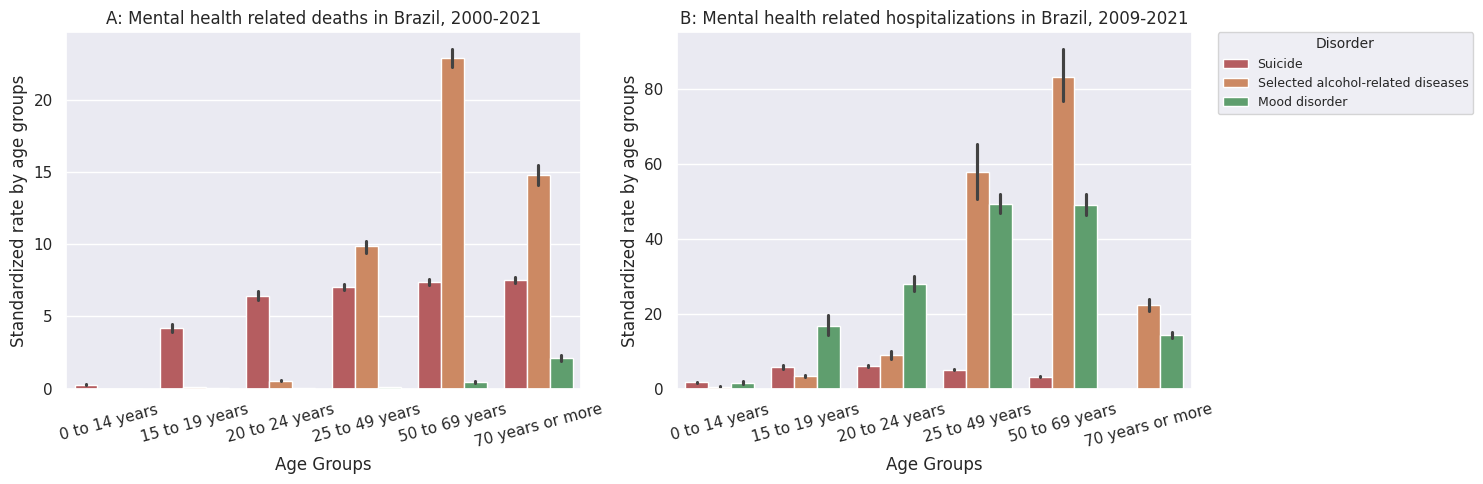

In [ ]:
# Cria uma figura com 2 subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Primeiro gráfico: Taxa de mortalidade por faixa etária (2000-2021)
palette1 = {
    "Alcool": "C1",
    "Transtorno de humor": "C2",
    "Suicidio": "C3"
}

sns.barplot(
    x='Faixa_Etaria',
    y='Taxa_Padronizada_Por_Faixa_Etaria',
    hue='Desordem',
    data=df_brazil,
    palette=palette1,
    ax=ax1,  # Desenha o gráfico no primeiro eixo
    legend=False
)
sns.set_theme()

ax1.set_xlabel("Age Groups")
ax1.set_ylabel("Standardized rate by age groups")
ax1.set_xticklabels(['0 to 14 years', '15 to 19 years', '20 to 24 years','25 to 49 years', '50 to 69 years', '70 years or more'], rotation= 15)
ax1.set_title('A: Mental health related deaths in Brazil, 2000-2021')

# Ajuste da legenda para o primeiro gráfico
# handles1, labels1 = ax1.get_legend_handles_labels()
# ax1.legend(
#     handles=handles1,
#     title="Disorder",
#     title_fontsize=10,
#     fontsize=9,
#     frameon=True,
#     labels=[
#         "Suicide",
#         "Selected alcohol-related diseases",
#         "Mood disorder"
#     ],
#     bbox_to_anchor=(1.05, 1),
#     borderaxespad=0
# )

# Segundo gráfico: Hospitalizações por faixa etária (2009-2021)
palette2 = {
    "Alcool": "C1",
    "Transtorno de humor": "C2",
    "Tentativa de Suicidio": "C3"
}

hue_order = ["Tentativa de Suicidio", "Alcool", "Transtorno de humor"]

sns.barplot(
    x='Faixa_Etaria',
    y='Taxa_Padronizada_Por_Faixa_Etaria',
    hue='Desordem',
    data=df2_brazil,
    palette=palette2,
    hue_order=hue_order,
    ax=ax2  # Desenha o gráfico no segundo eixo
)

ax2.set_xlabel("Age Groups")
ax2.set_ylabel("Standardized rate by age groups")
ax2.set_xticklabels(['0 to 14 years', '15 to 19 years', '20 to 24 years','25 to 49 years', '50 to 69 years', '70 years or more'], rotation =15)
ax2.set_title('B: Mental health related hospitalizations in Brazil, 2009-2021')

# Ajuste da legenda para o segundo gráfico
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(
    handles=handles2,
    title="Disorder",
    title_fontsize=10,
    fontsize=9,
    frameon=True,
    labels=[
        "Suicide",
        "Selected alcohol-related diseases",
        "Mood disorder"
    ],
    bbox_to_anchor=(1.05, 1),
    borderaxespad=0
)

# Ajusta o layout para que os subplots não se sobreponham
plt.tight_layout()

plt.savefig("Figura1.png", format='png', dpi=300)

plt.show()




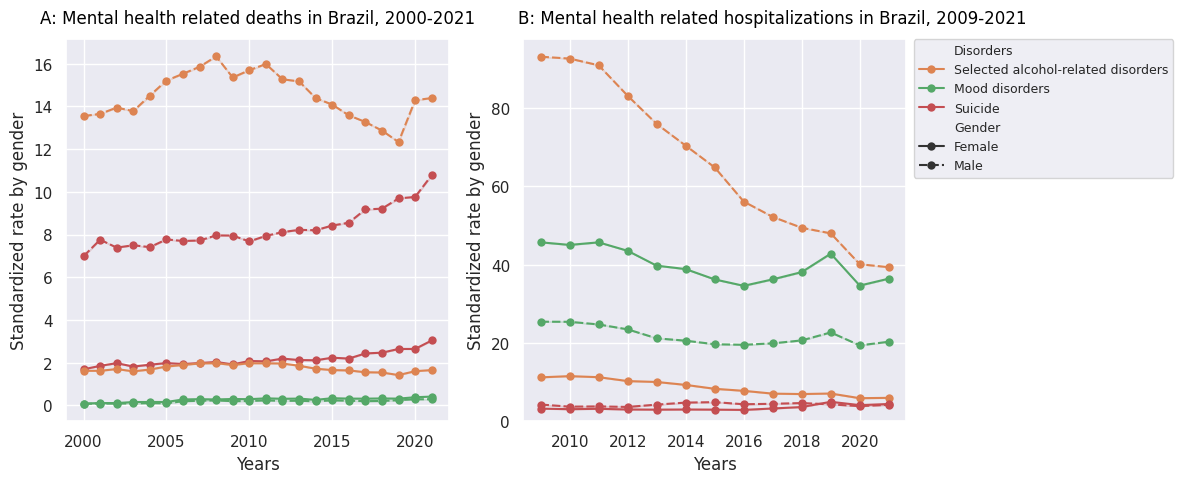

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

palette = {
    "Alcool": "C1",
    "Transtorno de humor" : "C2",
    "Suicidio" : "C3"
}

sns.lineplot(
    x='Ano',
    y='Taxa_Padronizada_Por_Sexo',
    hue='Desordem',
    style="Sexo",
    data=df_brazil,
    ax=ax1,
    palette=palette,
    marker='o',
    markeredgewidth=0,
    legend=False,
)

ax1.set_xlabel('Years')
ax1.set_ylabel('Standardized rate by gender')
sns.set_theme()

ax1.set_title("A: Mental health related deaths in Brazil, 2000-2021", fontsize=12, color="black", x=0.5, y=1.02)

palette = {
    "Alcool": "C1",
    "Transtorno de humor" : "C2",
    "Tentativa de Suicidio" : "C3"
}

sns.lineplot(
    x='Ano',
    y='Taxa_Padronizada_Por_Sexo',
    hue='Desordem',
    style="Sexo",
    data=df2_brazil,
    ax=ax2,
    palette=palette,
    marker='o',
    markeredgewidth=0,
)

ax2.set_xlabel('Years')
ax2.set_ylabel('Standardized rate by gender')
ax2.set_ylim(0, None)
sns.set_theme()

ax2.set_title("B: Mental health related hospitalizations in Brazil, 2009-2021", fontsize=12, color="black", x=0.65, y=1.02)

# Para o segundo gráfico (ax2)
handles2, labels2 = ax2.get_legend_handles_labels()

new_labels = [
    "Disorders",
    "Selected alcohol-related disorders",
    "Mood disorders",
    "Suicide" ,
    "Gender",
    "Female",
    "Male"
]

plt.legend(
    handles=handles2,
    fontsize=9,
    frameon=True,
    labels=new_labels,
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0
)


# ax2.legend(
#     handles=handles2,
#     # title="Disorder and Gender",
#     # title_fontsize=10,
#     fontsize=9,
#     frameon=True,
#     bbox_to_anchor=(1.02, 1),
#     loc='upper left'
# )

plt.tight_layout()

plt.savefig("Figura2.png", format='png', dpi=300)

plt.show()